<h4>All the required libraries to be imported</h4>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score,classification_report,accuracy_score

In [2]:
msg_dataframe = pd.read_csv(r"C:\Users\pjbah\Downloads\spam.csv")
msg_dataframe.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


<h4>Exploratory Data Analysis (EDA)</h4>

In [3]:
# To check whether there are any null values
msg_dataframe.isna().any().all()

False

In [4]:
msg_dataframe.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [5]:
# Gives the total count of each class variable
spam_ham = msg_dataframe['Class'].value_counts()
spam_ham

ham     2788
spam    1813
Name: Class, dtype: int64

<h4>DATA VISUALIZATION</h4>

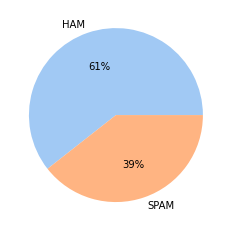

In [6]:
# Shows the percentage of ham and spam words or characters
colors = sns.color_palette('pastel')
labels = ['HAM', 'SPAM']
plt.pie(spam_ham, labels = labels, colors = colors, autopct = '%0.0f%%')
plt.show()

In [7]:
# label encoding the class variables
label_encoder = LabelEncoder()
msg_dataframe['Class']= label_encoder.fit_transform(msg_dataframe['Class'])
# ham 0 spam 1

<h4>Training the classifiers using 1000 instances, by keeping the test size as 0.78</h4>

In [8]:
# Assigning a variable to target variable and feature set
y=msg_dataframe["Class"]
msg_dataframe.drop(['Class'],axis=1,inplace=True)
x=msg_dataframe

In [9]:
# Splitting the train and test data
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.78)

In [10]:
# Shows the shape of the train and test feature set
print("Training feature shape: ", X_train.shape)
print("Testing feature shape: ", X_test.shape)

Training feature shape:  (1012, 57)
Testing feature shape:  (3589, 57)


In [11]:
# Showcasing the first 5 rows of training data
X_train.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
2651,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1.000,1,8
1819,0.63,0.0,0.63,0.0,1.27,0.0,0.63,0.0,0.0,0.0,...,0.0,0.1,0.000,0.0,0.501,0.3,0.0,2.458,22,118
3296,0.34,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.432,0.0,0.000,0.0,0.0,1.526,11,87
2500,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.529,0.0,0.000,0.0,0.0,4.000,11,68
2492,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,3.333,7,20


<h4>USING THE RANDOM FOREST CLASSIFIER</h4>

In [12]:
# Training the Random Forest classifier over train data using 100 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 100,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

### For multi class classification, per-class accuracy is the same as per-class recall

In [14]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2048   94]
 [ 145 1302]]
TOTAL ACCURACY SCORE:93%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


In [15]:
# Training the Random Forest classifier over train data using 500 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 500,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [16]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

In [17]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2056   86]
 [ 147 1300]]
TOTAL ACCURACY SCORE:94%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


In [18]:
# Training the Random Forest classifier over train data using 1000 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 1000,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [19]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

In [20]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2054   88]
 [ 148 1299]]
TOTAL ACCURACY SCORE:93%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


In [21]:
# Training the Random Forest classifier over train data using 100 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 100,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [22]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

In [23]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2055   87]
 [ 149 1298]]
TOTAL ACCURACY SCORE:93%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


In [24]:
# Training the Random Forest classifier over train data using 500 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 500,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [25]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

In [26]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2055   87]
 [ 144 1303]]
TOTAL ACCURACY SCORE:94%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


In [27]:
# Training the Random Forest classifier over train data using 1000 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 1000,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [28]:
# Performing the prediction over test data
msg_test_target_predict=clf.predict(X_test)

In [29]:
# Metrics performed on the test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[2054   88]
 [ 142 1305]]
TOTAL ACCURACY SCORE:94%
Accuracy of Ham class is 96%
Accuracy of Spam class is 90%


<h4>USING THE DECISION TREE CLASSIFIER</h4>

In [30]:
# Training the Decision tree over train data by keeping the criterion as entropy
clf2 = DecisionTreeClassifier(criterion = "entropy")
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
# Performing the prediction over test data
msg_test_target_predict=clf2.predict(X_test)

In [32]:
# Metrics performed on the test data
print("---------DECISION TREE CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------DECISION TREE CLASSIFIER-------------
CONFUSION MATRIX:
 [[1936  206]
 [ 215 1232]]
TOTAL ACCURACY SCORE:88%
Accuracy of Ham class is 90%
Accuracy of Spam class is 85%


<h4>Doing the vice versa, by taking test size as 0.22</h4>
<p>NOTE: We normally take more instances for training data, so I have tried to train the classifiers that way too.</p>

In [33]:
# Splitting the train and test data by keeping the test size as 0.22
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.22)

In [34]:
# Training the Random Forest classifier over train data using 100 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 100,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [36]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[592  20]
 [ 29 372]]
TOTAL ACCURACY SCORE:95%
Accuracy of Ham class is 97%
Accuracy of Spam class is 93%


In [37]:
# Training the Random Forest classifier over train data using 500 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 500,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [38]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [39]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))


---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[593  19]
 [ 25 376]]
TOTAL ACCURACY SCORE:96%
Accuracy of Ham class is 97%
Accuracy of Spam class is 94%


In [40]:
# Training the Random Forest classifier over train data using 1000 trees by setting the max features to auto
clf = RandomForestClassifier(n_estimators = 1000,max_features='auto')
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [41]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [42]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))


---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[593  19]
 [ 25 376]]
TOTAL ACCURACY SCORE:96%
Accuracy of Ham class is 97%
Accuracy of Spam class is 94%


In [43]:
# Training the Random Forest classifier over train data using 100 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 100,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [44]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [45]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))


---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[591  21]
 [ 24 377]]
TOTAL ACCURACY SCORE:96%
Accuracy of Ham class is 97%
Accuracy of Spam class is 94%


In [46]:
# Training the Random Forest classifier over train data using 500 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 500,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=500)

In [47]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [48]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))


---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[591  21]
 [ 26 375]]
TOTAL ACCURACY SCORE:95%
Accuracy of Ham class is 97%
Accuracy of Spam class is 94%


In [49]:
# Training the Random Forest classifier over train data using 1000 trees by setting the max features to sqrt
clf = RandomForestClassifier(n_estimators = 1000,max_features='sqrt')
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [50]:
# Performing the prediction over test data
msg_test_target_predict = clf.predict(X_test)

In [51]:
# Metrics to be performed on test data
print("---------RANDOM FOREST CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))


---------RANDOM FOREST CLASSIFIER-------------
CONFUSION MATRIX:
 [[592  20]
 [ 26 375]]
TOTAL ACCURACY SCORE:95%
Accuracy of Ham class is 97%
Accuracy of Spam class is 94%


In [52]:
# Training the Decision tree over train data by keeping the criterion as entropy
clf2 = DecisionTreeClassifier(criterion = "entropy")
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
# Performing the prediction over test data
msg_test_target_predict= clf2.predict(X_test)

In [54]:
# Metrics to be performed on test data
print("---------DECISION TREE CLASSIFIER-------------")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test, msg_test_target_predict))
print("TOTAL ACCURACY SCORE:{}%".format(round((accuracy_score(y_test, msg_test_target_predict))*100),2))
print("Accuracy of Ham class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=0))*100),2))
print("Accuracy of Spam class is {}%".format(round((recall_score(y_test, msg_test_target_predict,average='binary',pos_label=1))*100),2))

---------DECISION TREE CLASSIFIER-------------
CONFUSION MATRIX:
 [[575  37]
 [ 40 361]]
TOTAL ACCURACY SCORE:92%
Accuracy of Ham class is 94%
Accuracy of Spam class is 90%
